In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
%matplotlib inline
matplotlib.style.use("ggplot")

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
odds = pd.read_csv('../OnCourt/odds_atpII.csv', sep=';')

In [4]:
odds.head()

,ID_B_O,ID1_O,ID1_NAME,ID2_O,ID2_NAME,ID_T_O,DATE,ID_R_O,K1,K2
0,1,2,Marat Safin,722,Robin Vik,3810,20060828,4,"1,149999976",5
1,1,116,Vince Spadea,685,Gilles Muller,3810,20060828,4,"1,5","2,450000048"
2,1,609,Dmitry Tursunov,516,Igor Kunitsyn,3810,20060828,4,"1,100000024",6
3,1,19,Roger Federer,763,Jimmy Wang,3810,20060828,4,NaN,NaN
4,1,9,Tim Henman,48,Greg Rusedski,3810,20060828,4,"1,320000052","3,099999905"


In [5]:
import glob

In [6]:
path =r'../tennis_atp-master/Prueba' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

In [7]:
# 1. Take out matchs from Davies Cup:
framesD = frame[frame['tourney_level'] != 'D']
# 2. Take out matchs from Challenge CUP:
framesDC = framesD[framesD['tourney_level'] != 'C']
# 3.1. Take out marchs'W/O' (Walk Over):
framesDCWO = framesDC[framesDC['score'] != 'W/O']
# 3.2. Take out marchs' W/O' (Walk Over):
framesDCWO = framesDCWO[framesDCWO['score'] != ' W/O']
# 4. Take out matchs with high volume of NaNs:
framesDCWO2 = framesDCWO.dropna(axis=0, thresh=30)

In [8]:
framesDCWO2.shape

(47085, 49)

In [9]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,NaN,NaN,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,102776,1.0,NaN,Andrew Ilie,R,180.0,AUS,24.035592,50.0,762.0,3-6 7-6(6) 7-6(4),3,R32,162.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,NaN,Q,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,102821,NaN,WC,Cecil Mamiit,R,173.0,PHI,23.843943,139.0,280.0,6-2 7-5,3,R32,86.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,NaN,NaN,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,102205,NaN,NaN,Sebastien Lareau,R,183.0,CAN,27.011636,133.0,293.0,6-1 6-3,3,R32,64.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,NaN,NaN,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,102925,8.0,NaN,Justin Gimelstob,R,196.0,USA,23.260780,95.0,408.0,4-6 6-2 7-5,3,R32,150.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,4.0,NaN,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,101826,NaN,NaN,Alex Lopez Moron,R,175.0,ESP,29.423682,111.0,357.0,6-1 6-4,3,R32,60.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0


#### Para crear nuevas features (%victoria ultimos partidos, % victoria head to head, etc) necesitaremos ordenar por fecha el dataset. Sinembargo esto no lo haremos hasta mas adelante

In [10]:
framesDCWO2.isnull().sum()

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           25252
winner_entry          40954
winner_name               0
winner_hand               0
winner_ht              1447
winner_ioc                0
winner_age                0
winner_rank             603
winner_rank_points      603
loser_id                  0
loser_seed            35437
loser_entry           36789
loser_name                0
loser_hand                0
loser_ht               2591
loser_ioc                 0
loser_age                 2
loser_rank              688
loser_rank_points       688
score                     0
best_of                   0
round                     0
minutes                1295
w_ace                     0
w_df                      0
w_svpt                    0
w_1stIn                   0
w_1stWon            

In [11]:
partido = odds[(odds['ID1_NAME'] == 'Marat Safin') & (odds['ID2_NAME'] == 'Robin Vik')]

In [12]:
partido

,ID_B_O,ID1_O,ID1_NAME,ID2_O,ID2_NAME,ID_T_O,DATE,ID_R_O,K1,K2
0,1,2,Marat Safin,722,Robin Vik,3810,20060828,4,"1,149999976",5


In [13]:
framesDCWO2[framesDCWO2['tourney_date'] == 20060828]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
2384,2006-560,US Open,Hard,128,G,20060828,1,103819,1.0,NaN,Roger Federer,R,185.0,SUI,25.054073,1.0,7295.0,104499,NaN,NaN,Jimmy Wang,R,178.0,TPE,21.549624,109.0,394.0,6-4 6-1 6-0,5,R128,99.0,7.0,1.0,64.0,39.0,35.0,11.0,11.0,0.0,1.0,3.0,6.0,104.0,50.0,27.0,20.0,12.0,10.0,18.0
2385,2006-560,US Open,Hard,128,G,20060828,2,102450,NaN,NaN,Tim Henman,R,185.0,GBR,31.975359,62.0,640.0,102257,NaN,NaN,Greg Rusedski,L,193.0,GBR,32.974675,136.0,310.0,7-6(4) 6-2 6-3,5,R128,114.0,8.0,1.0,85.0,55.0,41.0,21.0,15.0,0.0,1.0,6.0,5.0,92.0,56.0,37.0,17.0,14.0,2.0,6.0
2386,2006-560,US Open,Hard,128,G,20060828,3,102434,NaN,NaN,Vincent Spadea,R,183.0,USA,32.109514,84.0,490.0,104180,NaN,NaN,Gilles Muller,L,193.0,LUX,23.304586,91.0,443.0,6-2 6-4 6-3,5,R128,98.0,4.0,2.0,84.0,50.0,35.0,20.0,13.0,4.0,5.0,2.0,7.0,93.0,61.0,38.0,13.0,14.0,5.0,11.0
2387,2006-560,US Open,Hard,128,G,20060828,4,102035,29.0,NaN,Jonas Bjorkman,R,183.0,SWE,34.431211,35.0,953.0,104812,NaN,WC,Scoville Jenkins,R,188.0,USA,19.928816,277.0,137.0,7-5 6-4 6-4,5,R128,135.0,5.0,5.0,95.0,57.0,46.0,17.0,16.0,6.0,9.0,2.0,6.0,101.0,62.0,39.0,20.0,16.0,11.0,17.0
2388,2006-560,US Open,Hard,128,G,20060828,5,103292,21.0,NaN,Gaston Gaudio,R,175.0,ARG,27.718001,24.0,1175.0,104312,NaN,NaN,Andreas Seppi,R,190.0,ITA,22.516085,71.0,565.0,6-4 6-4 6-2,5,R128,106.0,7.0,2.0,82.0,47.0,37.0,21.0,14.0,4.0,5.0,8.0,6.0,88.0,49.0,32.0,18.0,14.0,2.0,7.0
2389,2006-560,US Open,Hard,128,G,20060828,6,105023,NaN,WC,Sam Querrey,R,198.0,USA,18.891170,174.0,238.0,104259,NaN,NaN,Philipp Kohlschreiber,R,178.0,GER,22.866530,63.0,619.0,6-3 6-4 6-4,5,R128,90.0,7.0,3.0,85.0,56.0,41.0,21.0,15.0,2.0,2.0,6.0,3.0,90.0,48.0,33.0,22.0,14.0,6.0,9.0
2390,2006-560,US Open,Hard,128,G,20060828,7,102967,NaN,NaN,Marc Gicquel,R,188.0,FRA,29.412731,79.0,504.0,103294,NaN,NaN,Christophe Rochus,R,170.0,BEL,27.701574,65.0,605.0,6-3 6-3 6-4,5,R128,94.0,21.0,1.0,80.0,49.0,39.0,16.0,14.0,1.0,3.0,1.0,5.0,89.0,49.0,32.0,17.0,14.0,2.0,8.0
2391,2006-560,US Open,Hard,128,G,20060828,8,103507,16.0,NaN,Juan Carlos Ferrero,R,183.0,ESP,26.540726,18.0,1330.0,102567,NaN,Q,George Bastl,R,183.0,SUI,31.408624,142.0,291.0,7-5 6-4 3-6 6-3,5,R128,185.0,9.0,4.0,129.0,81.0,60.0,26.0,20.0,4.0,7.0,15.0,4.0,122.0,76.0,58.0,19.0,20.0,12.0,17.0
2392,2006-560,US Open,Hard,128,G,20060828,9,104607,12.0,NaN,Tomas Berdych,R,196.0,CZE,20.944559,14.0,1660.0,104081,NaN,NaN,Boris Pashanski,R,180.0,SRB,23.816564,87.0,456.0,6-4 6-2 6-1,5,R128,89.0,10.0,2.0,61.0,31.0,28.0,19.0,12.0,3.0,4.0,0.0,5.0,88.0,47.0,27.0,16.0,13.0,6.0,13.0
2393,2006-560,US Open,Hard,128,G,20060828,10,104252,NaN,NaN,Florian Mayer,R,190.0,GER,22.896646,58.0,675.0,102905,NaN,Q,Stefan Koubek,L,175.0,AUT,29.650924,123.0,358.0,6-4 6-1 6-1,5,R128,71.0,5.0,0.0,65.0,36.0,27.0,20.0,12.0,1.0,2.0,0.0,3.0,65.0,30.0,17.0,15.0,12.0,5.0,12.0


In [14]:
partido = odds[(odds['ID1_NAME'] == 'Marat Safin') & (odds['ID2_NAME'] == 'Robin Vik') & (odds['DATE'] == 20060828)]

In [15]:
partido

,ID_B_O,ID1_O,ID1_NAME,ID2_O,ID2_NAME,ID_T_O,DATE,ID_R_O,K1,K2
0,1,2,Marat Safin,722,Robin Vik,3810,20060828,4,"1,149999976",5


In [16]:
partido2 = framesDCWO2[(framesDCWO2['winner_name'] == 'Marat Safin') & (framesDCWO2['loser_name'] == 'Robin Vik') 
                       & (framesDCWO2['tourney_date'] == 20060828)]

In [17]:
partido2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
2401,2006-560,US Open,Hard,128,G,20060828,18,103498,NaN,NaN,Marat Safin,R,193.0,RUS,26.584531,104.0,400.0,103503,NaN,NaN,Robin Vik,R,183.0,CZE,26.55989,85.0,487.0,6-1 6-1 3-6 6-3,5,R128,108.0,15.0,0.0,89.0,53.0,44.0,21.0,16.0,6.0,7.0,6.0,2.0,103.0,68.0,45.0,15.0,16.0,7.0,13.0


#### VOY A GENERAR LA KEY de la matriz odd

In [18]:
odds['OddKey'] = odds[['ID1_NAME', 'ID2_NAME']].apply(lambda x: ''.join(x), axis=1)

In [19]:
odds.head()

,ID_B_O,ID1_O,ID1_NAME,ID2_O,ID2_NAME,ID_T_O,DATE,ID_R_O,K1,K2,OddKey
0,1,2,Marat Safin,722,Robin Vik,3810,20060828,4,"1,149999976",5,Marat SafinRobin Vik
1,1,116,Vince Spadea,685,Gilles Muller,3810,20060828,4,"1,5","2,450000048",Vince SpadeaGilles Muller
2,1,609,Dmitry Tursunov,516,Igor Kunitsyn,3810,20060828,4,"1,100000024",6,Dmitry TursunovIgor Kunitsyn
3,1,19,Roger Federer,763,Jimmy Wang,3810,20060828,4,NaN,NaN,Roger FedererJimmy Wang
4,1,9,Tim Henman,48,Greg Rusedski,3810,20060828,4,"1,320000052","3,099999905",Tim HenmanGreg Rusedski


In [20]:
odds['OddKey2'] = odds['DATE'].map(str) + odds['OddKey']

In [21]:
odds.head()

,ID_B_O,ID1_O,ID1_NAME,ID2_O,ID2_NAME,ID_T_O,DATE,ID_R_O,K1,K2,OddKey,OddKey2
0,1,2,Marat Safin,722,Robin Vik,3810,20060828,4,"1,149999976",5,Marat SafinRobin Vik,20060828Marat SafinRobin Vik
1,1,116,Vince Spadea,685,Gilles Muller,3810,20060828,4,"1,5","2,450000048",Vince SpadeaGilles Muller,20060828Vince SpadeaGilles Muller
2,1,609,Dmitry Tursunov,516,Igor Kunitsyn,3810,20060828,4,"1,100000024",6,Dmitry TursunovIgor Kunitsyn,20060828Dmitry TursunovIgor Kunitsyn
3,1,19,Roger Federer,763,Jimmy Wang,3810,20060828,4,NaN,NaN,Roger FedererJimmy Wang,20060828Roger FedererJimmy Wang
4,1,9,Tim Henman,48,Greg Rusedski,3810,20060828,4,"1,320000052","3,099999905",Tim HenmanGreg Rusedski,20060828Tim HenmanGreg Rusedski


#### AHORA VOY A GENERAR la Key de la matriz frame:

In [22]:
framesDCWO2['OddKey'] = framesDCWO2[['winner_name', 'loser_name']].apply(lambda x: ''.join(x), axis=1)

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,OddKey
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,NaN,NaN,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,102776,1.0,NaN,Andrew Ilie,R,180.0,AUS,24.035592,50.0,762.0,3-6 7-6(6) 7-6(4),3,R32,162.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0,Antony DupuisAndrew Ilie
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,NaN,Q,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,102821,NaN,WC,Cecil Mamiit,R,173.0,PHI,23.843943,139.0,280.0,6-2 7-5,3,R32,86.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0,Fernando GonzalezCecil Mamiit
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,NaN,NaN,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,102205,NaN,NaN,Sebastien Lareau,R,183.0,CAN,27.011636,133.0,293.0,6-1 6-3,3,R32,64.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0,Paradorn SrichaphanSebastien Lareau
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,NaN,NaN,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,102925,8.0,NaN,Justin Gimelstob,R,196.0,USA,23.260780,95.0,408.0,4-6 6-2 7-5,3,R32,150.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0,Jan SiemerinkJustin Gimelstob
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,4.0,NaN,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,101826,NaN,NaN,Alex Lopez Moron,R,175.0,ESP,29.423682,111.0,357.0,6-1 6-4,3,R32,60.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0,Jason StoltenbergAlex Lopez Moron


In [24]:
framesDCWO2['OddKey2'] = framesDCWO2['tourney_date'].map(str) + framesDCWO2['OddKey']

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,OddKey,OddKey2
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,NaN,NaN,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,102776,1.0,NaN,Andrew Ilie,R,180.0,AUS,24.035592,50.0,762.0,3-6 7-6(6) 7-6(4),3,R32,162.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0,Antony DupuisAndrew Ilie,20000501Antony DupuisAndrew Ilie
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,NaN,Q,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,102821,NaN,WC,Cecil Mamiit,R,173.0,PHI,23.843943,139.0,280.0,6-2 7-5,3,R32,86.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0,Fernando GonzalezCecil Mamiit,20000501Fernando GonzalezCecil Mamiit
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,NaN,NaN,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,102205,NaN,NaN,Sebastien Lareau,R,183.0,CAN,27.011636,133.0,293.0,6-1 6-3,3,R32,64.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0,Paradorn SrichaphanSebastien Lareau,20000501Paradorn SrichaphanSebastien Lareau
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,NaN,NaN,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,102925,8.0,NaN,Justin Gimelstob,R,196.0,USA,23.260780,95.0,408.0,4-6 6-2 7-5,3,R32,150.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0,Jan SiemerinkJustin Gimelstob,20000501Jan SiemerinkJustin Gimelstob
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,4.0,NaN,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,101826,NaN,NaN,Alex Lopez Moron,R,175.0,ESP,29.423682,111.0,357.0,6-1 6-4,3,R32,60.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0,Jason StoltenbergAlex Lopez Moron,20000501Jason StoltenbergAlex Lopez Moron


#### Ahora vamos a hacer un diccionario con OddKey2 y K1 y crear la columna K1 en nuestro  df para que que la rellene con los elementos que coincidan con la KEY

In [26]:
framesDCWO2["K1"] = np.nan

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,OddKey,OddKey2,K1
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,NaN,NaN,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,102776,1.0,NaN,Andrew Ilie,R,180.0,AUS,24.035592,50.0,762.0,3-6 7-6(6) 7-6(4),3,R32,162.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0,Antony DupuisAndrew Ilie,20000501Antony DupuisAndrew Ilie,NaN
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,NaN,Q,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,102821,NaN,WC,Cecil Mamiit,R,173.0,PHI,23.843943,139.0,280.0,6-2 7-5,3,R32,86.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0,Fernando GonzalezCecil Mamiit,20000501Fernando GonzalezCecil Mamiit,NaN
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,NaN,NaN,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,102205,NaN,NaN,Sebastien Lareau,R,183.0,CAN,27.011636,133.0,293.0,6-1 6-3,3,R32,64.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0,Paradorn SrichaphanSebastien Lareau,20000501Paradorn SrichaphanSebastien Lareau,NaN
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,NaN,NaN,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,102925,8.0,NaN,Justin Gimelstob,R,196.0,USA,23.260780,95.0,408.0,4-6 6-2 7-5,3,R32,150.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0,Jan SiemerinkJustin Gimelstob,20000501Jan SiemerinkJustin Gimelstob,NaN
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,4.0,NaN,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,101826,NaN,NaN,Alex Lopez Moron,R,175.0,ESP,29.423682,111.0,357.0,6-1 6-4,3,R32,60.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0,Jason StoltenbergAlex Lopez Moron,20000501Jason StoltenbergAlex Lopez Moron,NaN


In [28]:
framesDCWO2.isnull().sum()

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           25252
winner_entry          40954
winner_name               0
winner_hand               0
winner_ht              1447
winner_ioc                0
winner_age                0
winner_rank             603
winner_rank_points      603
loser_id                  0
loser_seed            35437
loser_entry           36789
loser_name                0
loser_hand                0
loser_ht               2591
loser_ioc                 0
loser_age                 2
loser_rank              688
loser_rank_points       688
score                     0
best_of                   0
round                     0
minutes                1295
w_ace                     0
w_df                      0
w_svpt                    0
w_1stIn                   0
w_1stWon            

In [29]:
K1dict = dict(zip(odds.OddKey2, odds.K1))

In [30]:
framesDCWO2['K1'] = framesDCWO2['K1'].fillna(framesDCWO2['OddKey2'].map(K1dict))

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
framesDCWO2.isnull().sum()

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           25252
winner_entry          40954
winner_name               0
winner_hand               0
winner_ht              1447
winner_ioc                0
winner_age                0
winner_rank             603
winner_rank_points      603
loser_id                  0
loser_seed            35437
loser_entry           36789
loser_name                0
loser_hand                0
loser_ht               2591
loser_ioc                 0
loser_age                 2
loser_rank              688
loser_rank_points       688
score                     0
best_of                   0
round                     0
minutes                1295
w_ace                     0
w_df                      0
w_svpt                    0
w_1stIn                   0
w_1stWon            

In [32]:
framesDCWO2["K2"] = np.nan

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
K2dict = dict(zip(odds.OddKey2, odds.K2))

In [34]:
framesDCWO2['K2'] = framesDCWO2['K2'].fillna(framesDCWO2['OddKey2'].map(K2dict))

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
framesDCWO2.isnull().sum()

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           25252
winner_entry          40954
winner_name               0
winner_hand               0
winner_ht              1447
winner_ioc                0
winner_age                0
winner_rank             603
winner_rank_points      603
loser_id                  0
loser_seed            35437
loser_entry           36789
loser_name                0
loser_hand                0
loser_ht               2591
loser_ioc                 0
loser_age                 2
loser_rank              688
loser_rank_points       688
score                     0
best_of                   0
round                     0
minutes                1295
w_ace                     0
w_df                      0
w_svpt                    0
w_1stIn                   0
w_1stWon            

In [36]:
framesDCWO2.shape

(47085, 53)

In [37]:
framesDCWO2.sample(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,OddKey,OddKey2,K1,K2
2350,2012-375,Montpellier,Hard,28,A,20120130,27,104607,1.0,NaN,Tomas Berdych,R,196.0,CZE,26.368241,7.0,3700.0,104792,3.0,NaN,Gael Monfils,R,193.0,FRA,25.412731,13.0,1970.0,6-2 4-6 6-3,3,F,125.0,12.0,2.0,93.0,58.0,45.0,17.0,14.0,4.0,5.0,11.0,6.0,91.0,56.0,46.0,10.0,13.0,7.0,10.0,Tomas BerdychGael Monfils,20120130Tomas BerdychGael Monfils,"1,5","2,875"
1740,2010-807,Acapulco,Clay,32,A,20100222,9,103656,8.0,NaN,Albert Montanes,R,175.0,ESP,29.240246,29.0,1300.0,104593,NaN,NaN,Daniel Gimeno Traver,R,185.0,ESP,24.544832,79.0,613.0,7-5 4-6 6-2,3,R32,149.0,3.0,4.0,100.0,67.0,45.0,16.0,15.0,10.0,14.0,2.0,3.0,98.0,53.0,31.0,23.0,15.0,5.0,11.0,Albert MontanesDaniel Gimeno Traver,20100222Albert MontanesDaniel Gimeno Traver,NaN,NaN
2038,2008-741,Nottingham,Grass,32,A,20080616,20,104312,7.0,NaN,Andreas Seppi,R,190.0,ITA,24.317591,30.0,990.0,104724,NaN,NaN,Eduardo Schwank,R,183.0,ARG,22.149213,61.0,609.0,6-1 4-6 7-6(7),3,R16,131.0,4.0,3.0,103.0,68.0,50.0,18.0,15.0,6.0,8.0,8.0,6.0,94.0,65.0,42.0,15.0,14.0,8.0,11.0,Andreas SeppiEduardo Schwank,20080616Andreas SeppiEduardo Schwank,"1,450000048","2,549999952"
19,2010-301,Auckland,Hard,28,A,20100111,20,103096,NaN,NaN,Arnaud Clement,R,173.0,FRA,32.068446,67.0,647.0,103970,2.0,NaN,David Ferrer,R,175.0,ESP,27.778234,17.0,1870.0,7-5 6-4,3,R16,110.0,3.0,3.0,93.0,52.0,37.0,21.0,11.0,5.0,5.0,2.0,1.0,60.0,43.0,30.0,9.0,11.0,2.0,4.0,Arnaud ClementDavid Ferrer,20100111Arnaud ClementDavid Ferrer,"3,789999962","1,322999954"
1272,2014-404,Indian Wells Masters,Hard,96,M,20140306,92,104925,2.0,NaN,Novak Djokovic,R,188.0,SRB,26.781656,2.0,10260.0,103898,NaN,NaN,Julien Benneteau,R,185.0,FRA,32.199863,65.0,730.0,6-1 6-3,3,QF,69.0,7.0,3.0,41.0,27.0,25.0,8.0,8.0,0.0,0.0,2.0,2.0,64.0,34.0,22.0,9.0,8.0,11.0,15.0,Novak DjokovicJulien Benneteau,20140306Novak DjokovicJulien Benneteau,NaN,NaN


#### Ahora vamos a analizar variables:
#### a) Variables constantes:
    1. Hand
    2. Best of
#### b) Variables que constantes por diferencias:
1. Diferencia de edad
2. Diferencia de altura
3. Diferencia de rank
4. Diferencia de odds

#### c) Variables que cambian con el tiempo:
1. % victoria sobre tierra/cesped/etc
2. % victoria sobre torneos (Grand Slama/Open/etc...)
3. % minues per match
4. % Ret por temporada
5. % Aces
6. % df
7. %

#### d) Otras variables:
1. Victorias en los ultimos 5 partidos
2. % Victoria Head to Head
3. Victorias en los ultimos partidos Head to Head

#### Voy a hacer mi base line:

In [38]:
framesDCWO2_bl = framesDCWO2[['tourney_date', 'winner_rank', 'loser_rank']]

In [39]:
framesDCWO2_bl.head()

,tourney_date,winner_rank,loser_rank
0,20000501,113.0,50.0
1,20000501,352.0,139.0
2,20000501,103.0,133.0
3,20000501,107.0,95.0
4,20000501,74.0,111.0


In [40]:
framesDCWO2_bl.shape

(47085, 3)

Voy a crear la columna dif_rank que es la que voy a utilizar para hacer el baseline. Voy a dividir el dataframe en 2 para poder dividir entre loser y winner aplicando la misma formula con el signo cambiado y utilizando una Y diferente (0 o 1)

In [41]:
framesDCWO2_bl = np.split(framesDCWO2_bl, [23542], axis = 0)

In [42]:
framesDCWO2_bl_w = framesDCWO2_bl[0]
framesDCWO2_bl_l = framesDCWO2_bl[1]

In [43]:
framesDCWO2_bl_w.head()

,tourney_date,winner_rank,loser_rank
0,20000501,113.0,50.0
1,20000501,352.0,139.0
2,20000501,103.0,133.0
3,20000501,107.0,95.0
4,20000501,74.0,111.0


In [44]:
framesDCWO2_bl_w.shape

(23542, 3)

In [45]:
framesDCWO2_bl_l.head()

,tourney_date,winner_rank,loser_rank
479,20080128,78.0,76.0
480,20080128,111.0,29.0
481,20080128,58.0,167.0
482,20080128,106.0,125.0
483,20080128,21.0,86.0


In [46]:
framesDCWO2_bl_l.shape

(23543, 3)

#### Para teminar vamos a crear la columna Y que en el caso de loser sera igual a 0 y en el caso de winner sera igual a 1

In [47]:
framesDCWO2_bl_w['Y']=1
framesDCWO2_bl_l['Y']=0

In [48]:
framesDCWO2_bl_l.head()

,tourney_date,winner_rank,loser_rank,Y
479,20080128,78.0,76.0,0
480,20080128,111.0,29.0,0
481,20080128,58.0,167.0,0
482,20080128,106.0,125.0,0
483,20080128,21.0,86.0,0


In [49]:
framesDCWO2_bl_w.head()

,tourney_date,winner_rank,loser_rank,Y
0,20000501,113.0,50.0,1
1,20000501,352.0,139.0,1
2,20000501,103.0,133.0,1
3,20000501,107.0,95.0,1
4,20000501,74.0,111.0,1


#### Ahora voy a crear la columna dif rank, que en el caso de los winner (Y=0) sera w - l y en el de los los loser (Y=0) sera l - w o - w + l

In [50]:
framesDCWO2_bl_w['dif_rank'] = framesDCWO2_bl_w['winner_rank'] - framesDCWO2_bl_w['loser_rank']

In [51]:
framesDCWO2_bl_w.head()

,tourney_date,winner_rank,loser_rank,Y,dif_rank
0,20000501,113.0,50.0,1,63.0
1,20000501,352.0,139.0,1,213.0
2,20000501,103.0,133.0,1,-30.0
3,20000501,107.0,95.0,1,12.0
4,20000501,74.0,111.0,1,-37.0


In [52]:
framesDCWO2_bl_l['dif_rank'] = - framesDCWO2_bl_l['winner_rank'] + framesDCWO2_bl_l['loser_rank']

In [54]:
framesDCWO2_bl_l.head()

,tourney_date,winner_rank,loser_rank,Y,dif_rank
479,20080128,78.0,76.0,0,-2.0
480,20080128,111.0,29.0,0,-82.0
481,20080128,58.0,167.0,0,109.0
482,20080128,106.0,125.0,0,19.0
483,20080128,21.0,86.0,0,65.0


#### Vamos a quitar a continuacion los NaN

In [58]:
framesDCWO2_bl_w.isnull().sum()

tourney_date      0
winner_rank     595
loser_rank      635
Y                 0
dif_rank        649
dtype: int64

In [59]:
framesDCWO2_bl_l.isnull().sum()

tourney_date     0
winner_rank      8
loser_rank      53
Y                0
dif_rank        61
dtype: int64

In [61]:
framesDCWO2_b2_w = framesDCWO2_bl_w.dropna(subset = ['winner_rank', 'loser_rank', 'dif_rank'])

In [62]:
framesDCWO2_b2_l = framesDCWO2_bl_l.dropna(subset = ['winner_rank', 'loser_rank', 'dif_rank'])

In [64]:
x = framesDCWO2_b2_w.shape
y = framesDCWO2_b2_l.shape
print x
print y

(22893, 5)
(23482, 5)


In [65]:
framesDCWO2_b2_w.isnull().sum()

tourney_date    0
winner_rank     0
loser_rank      0
Y               0
dif_rank        0
dtype: int64

In [66]:
framesDCWO2_b2_l.isnull().sum()

tourney_date    0
winner_rank     0
loser_rank      0
Y               0
dif_rank        0
dtype: int64

#### Ahora vamos a unir los dos dataframes:

In [67]:
frames = [framesDCWO2_b2_w, framesDCWO2_b2_l] 
framesDCWO2_b2 = pd.concat(frames)

In [68]:
framesDCWO2_b2.shape

(46375, 5)

#### A continuacion vamos a estudir la normalidad de las variables

Lo primero que voy a hacer es una matriz que contenga solo variables numericas para el analisis:

In [69]:
framesDCWO2_b2_Float = framesDCWO2_b2[['winner_rank','loser_rank','dif_rank']]

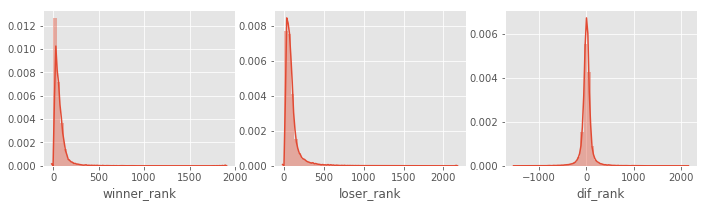

In [70]:
plt.figure(figsize=(20,20))
for index,col in enumerate(framesDCWO2_b2_Float.columns):
    plt.subplot(6,5,index+1)
    sns.distplot(framesDCWO2_b2_Float[col])

In [71]:
framesDCWO2_b2_Float['dif_rank'].mean(),framesDCWO2_b2_Float['dif_rank'].median()

(0.4057574123989218, 3.0)

In [80]:
framesDCWO2_b2_Float.max(),framesDCWO2_b2_Float.min()

(winner_rank    1890.0
 loser_rank     2159.0
 dif_rank       2125.0
 dtype: float64, winner_rank       1.0
 loser_rank        1.0
 dif_rank      -1515.0
 dtype: float64)

In [72]:
from scipy import stats

In [82]:
stats.trim_mean(framesDCWO2_b2_Float['dif_rank'], 0.01)

0.52115558098087966

In [89]:
np.percentile(framesDCWO2_b2_Float['dif_rank'], 49)

1.0

La media y la mediana practicamente coninciden. La mayor parte de los valores se situan entorno a la media (99%) pero existen algunos valores extremos. ¿Deberiamos quitar algunos de esos valores extremos o aportan informacion?

#### Vamos a normalizar las variables

In [90]:
framesDCWO2_b2['winner_rank'].mean()

58.495374663072774

In [91]:
framesDCWO2_b2['loser_rank'].mean()

91.935525606469

In [92]:
loser_rank_mean = framesDCWO2_b2['loser_rank'].mean()
loser_rank_std = framesDCWO2_b2['loser_rank'].std()
framesDCWO2_b2['loser_rank_N'] = framesDCWO2_b2['loser_rank'].apply(lambda x: (x - loser_rank_mean )/loser_rank_std)

In [93]:
winner_rank_mean = framesDCWO2_b2['winner_rank'].mean()
winner_rank_std = framesDCWO2_b2['winner_rank'].std()
framesDCWO2_b2['winner_rank_N'] = framesDCWO2_b2['winner_rank'].apply(lambda x: (x - winner_rank_mean )/winner_rank_std)

In [94]:
dif_rank_mean = framesDCWO2_b2['dif_rank'].mean()
dif_rank_std = framesDCWO2_b2['dif_rank'].std()
framesDCWO2_b2['dif_rank_N'] = framesDCWO2_b2['dif_rank'].apply(lambda x: (x - dif_rank_mean )/dif_rank_std)

In [97]:
framesDCWO2_b2.sample(10)

,tourney_date,winner_rank,loser_rank,Y,dif_rank,loser_rank_N,winner_rank_N,dif_rank_N
923,20080721,203.0,33.0,0,-170.0,-0.505768,1.983241,-1.271569
1823,20110102,64.0,53.0,0,-11.0,-0.334134,0.075548,-0.085110
1010,20011015,130.0,22.0,1,108.0,-0.600167,0.981359,0.802869
1155,20120220,50.0,9.0,0,-41.0,-0.711730,-0.116594,-0.308970
894,20000501,59.0,75.0,1,-16.0,-0.145336,0.006926,-0.122420
2411,20041011,33.0,88.0,1,-55.0,-0.033774,-0.349909,-0.413438
1227,20000626,18.0,387.0,1,-369.0,2.532162,-0.555775,-2.756508
535,20060320,81.0,552.0,1,-471.0,3.948146,0.308863,-3.517633
1388,20000807,4.0,34.0,1,-30.0,-0.497187,-0.747917,-0.226888
1033,20091025,77.0,69.0,0,-8.0,-0.196826,0.253965,-0.062724


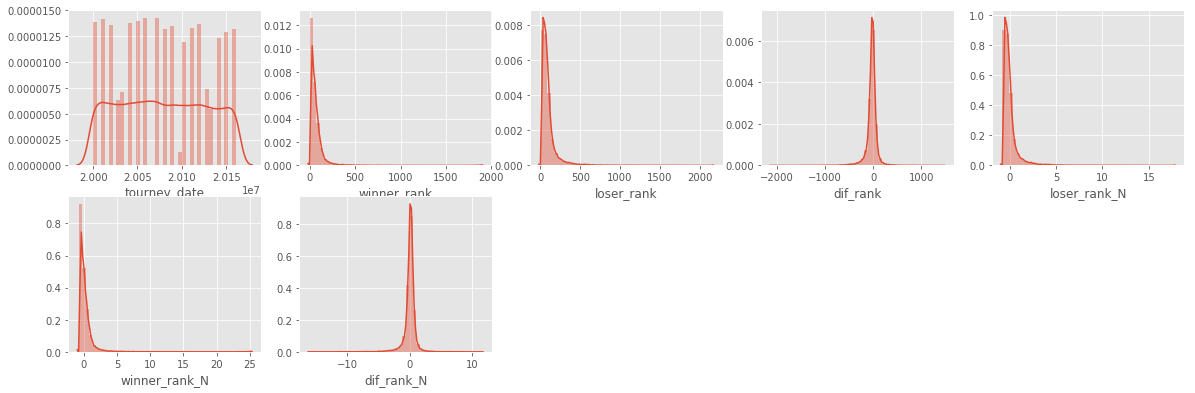

In [51]:
plt.figure(figsize=(20,20))
for index,col in enumerate(framesDCWO2_b2.columns):
    plt.subplot(6,5,index+1)
    sns.distplot(framesDCWO2_b2[col])

In [98]:
framesDCWO2_b2.isnull().sum()

tourney_date     0
winner_rank      0
loser_rank       0
Y                0
dif_rank         0
loser_rank_N     0
winner_rank_N    0
dif_rank_N       0
dtype: int64

#### Una vez normalizadas voy a hacer un modelo sencillo para obtener mi accuracy inicial, basado simplemente en la diferencia de ranking atp. Evidentemente, el accuracy va a ser bajo, aunque debería superar el 50%, que es la probabilidad de que suceda uno de los dos posibles resultados aleatoriamente

In [99]:
import matplotlib.pyplot as plt
from sklearn import linear_model

In [158]:
#X_w = framesDCWO2_b2[['winner_rank_N', 'dif_rank_N']]
#X_w['Y'] = 1

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [159]:
#X_l = framesDCWO2_b2[['loser_rank_N', 'dif_rank_N']]
#X_l['Y'] = 0

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [100]:
framesDCWO2_b3 = framesDCWO2_b2[['Y','dif_rank_N']]

In [102]:
framesDCWO2_b3.sample(5)

,Y,dif_rank_N
1924,1,-0.085110
312,1,1.720696
1066,0,0.579009
1080,1,-0.122420
260,1,-4.427998


In [163]:
#frame = [X_w, X_l]
#result = pd.concat(frame)

In [169]:
#result.sample(5)

,Y,dif_rank_N,loser_rank_N,winner_rank_N
2644,0,-0.297132,-0.119591,NaN
379,0,0.712319,-0.540095,NaN
837,0,-0.458952,0.180770,NaN
1554,1,-0.281720,NaN,-0.240114
200,0,0.712319,-0.351297,NaN


In [170]:
#result['loser_rank_N']=result['loser_rank_N'].fillna(0)
#result['winner_rank_N']=result['winner_rank_N'].fillna(0)

In [174]:
#result.sample(5)

,Y,dif_rank_N,loser_rank_N,winner_rank_N
2195,1,0.203741,0.0,-0.075421
2102,1,0.142095,0.0,-0.445980
1388,1,0.319327,0.0,-0.322460
843,1,0.319327,0.0,0.528453
797,1,-2.393091,0.0,-0.624397


In [175]:
#result.shape

(92750, 4)

In [183]:
#X.shape

(92750, 3)

In [185]:
#Y.shape

(92750, 1)

In [103]:
X = framesDCWO2_b3[['dif_rank_N']]

In [104]:
y = framesDCWO2_b3[['Y']]

In [105]:
logreg = linear_model.LogisticRegression()

In [106]:
logreg.fit(X, y)

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [140]:
logreg.score(X, y, sample_weight=None)

0.65860916442048523

#### Como habiamos predecido, nuestro baseline es practicamente igual a la probabilidad aleatoria ya que la posicion en el rank no aporta mucha informacion al modelo, especialmente cuando los rank sean mas cercanos entre si.

#### Ahora vamos a probar con un KNeigbours:

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [112]:
neigh = KNeighborsClassifier(n_neighbors = 3)

In [113]:
neigh.fit(X, y)

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [115]:
(neigh.predict([[0.5]]))

array([0])

In [116]:
(neigh.predict([[-0.5]]))

array([1])

#### Las predicciones funcionan, el rank medio del ganador es 58 frente a 91 del perdedor, por tanto la tendencia es dar como ganador al que tenga el rank mas bajo.

In [117]:
from sklearn.cross_validation import train_test_split

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [119]:
len(X_train)

34781

In [120]:
len(y_test)

11594

In [125]:
clf = KNeighborsClassifier(n_neighbors=5)

In [126]:
clf.fit(X_train, y_train)

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [127]:
from sklearn.metrics import accuracy_score

In [128]:
accuracy_score(clf.predict(X_test), y_test)

0.58987407279627391

In [136]:
accuracy_score(clf.predict(X_train), y_train)

0.60590552313044477

#### Vamos a completar el analisis del resultado: Vamos a mostrar la matriz de confusion y a mostrar el indice de
#### Precision = True Positives / Total positives identified
#### Recall = True positives / Total positives

¿Como podemos saber cual es el numero óptimo de k?

In [144]:
from sklearn.metrics import confusion_matrix

In [145]:
mat = confusion_matrix(y_test,clf.predict(X_test))
dfmat = pd.DataFrame(mat,index = ["Win","Lose"],
                  columns = ["Win","Lose"])

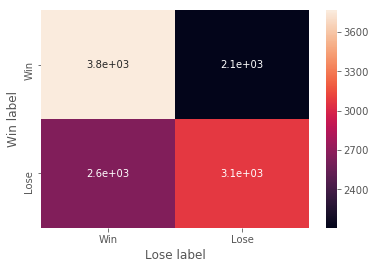

In [146]:
sns.heatmap(dfmat,annot=True)
plt.ylabel('Win label')
plt.xlabel('Lose label')

In [147]:
from sklearn.metrics import precision_score, recall_score, f1_score
print ["Win","Lose"]
print precision_score(y_test,clf.predict(X_test),average=None)
print recall_score(y_test,clf.predict(X_test),average=None)
print f1_score(y_test,clf.predict(X_test),average=None)

['Win', 'Lose']
[ 0.58702433  0.59340023]
[ 0.64111736  0.53730561]
[ 0.61287959  0.56396149]


#### El accuracy de kneighbours es ligeramente inferior al obtenido en la regresion
#### Evidentemente el accuracy en el set de train es ligeramente superior al de test

¿Como podemos saber cual es el numero óptimo de k?

In [150]:
scores=[]
for i in range(1,40):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    scores.append(accuracy_score(clf.predict(X_test), y_test))

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


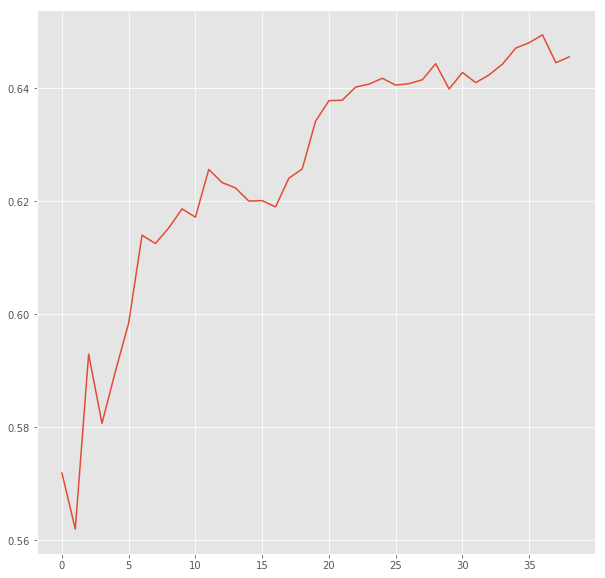

In [151]:
plt.figure(figsize=(10,10))
plt.plot(scores)
plt.show()

#### Parece que el mejor resultado nos lo daría con unos 20 vecinos, auque el indice de variacion es pequeño y probablemente con un numero de k tan elevado se produzca overfiting.

Me falta hacer un cross val score para poder tener resultados medios de varias particiones

In [154]:
#### ¿Porque no funciona cross val score??

In [160]:
X_train.head()

,dif_rank_N
2217,0.384997
408,-0.599988
114,0.108902
2366,-0.234350
1401,0.123826


In [161]:
X_train.shape

(34781, 1)

In [162]:
y_train.head()

,Y
2217,0
408,1
114,0
2366,1
1401,1


In [163]:
y_train.shape

(34781, 1)

In [170]:
cv_scores=[]
for i in range(1,40):
    clf = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(clf,X_train, y_train, cv=10, scoring='accuracy_score')
    cv_scores.append(scores.mean())

IndexError: too many indices for array